In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [22]:
df = pd.read_csv('sample_file_update.csv')
#df=df.head(10000)

In [23]:
to_drop=['model_year','fuel_type','lower_speed_interval','upper_speed_interval']

In [24]:
df.drop(to_drop,inplace=True,axis=1)

In [25]:
df.dtypes

Unnamed: 0          int64
reference_year     object
CH4               float64
CO                float64
CO2               float64
EC                float64
HONO              float64
N2O               float64
NH3               float64
NH4               float64
NO                float64
NO2               float64
NO3               float64
NOx               float64
PM10              float64
PM25              float64
ROG               float64
SO2               float64
SOX               float64
THC               float64
TOG               float64
VOC               float64
dtype: object

In [26]:
df.dtypes

Unnamed: 0          int64
reference_year     object
CH4               float64
CO                float64
CO2               float64
EC                float64
HONO              float64
N2O               float64
NH3               float64
NH4               float64
NO                float64
NO2               float64
NO3               float64
NOx               float64
PM10              float64
PM25              float64
ROG               float64
SO2               float64
SOX               float64
THC               float64
TOG               float64
VOC               float64
dtype: object

In [27]:
#df = df.pivot_table(values='ef', index=['reference_year', 'model_year', 'fuel_type', 'lower_speed_interval', 'upper_speed_interval'], columns='pollutant').reset_index()

In [28]:
#df['reference_year']=pd.to_datetime(df['reference_year'])

In [29]:
df.head()

,Unnamed: 0,reference_year,CH4,CO,CO2,EC,HONO,N2O,NH3,NH4,...,NO3,NOx,PM10,PM25,ROG,SO2,SOX,THC,TOG,VOC
0,0,2010-01-01,0.349365,0.826858,1462.859445,NaN,NaN,0.229358,NaN,NaN,...,NaN,21.564560,0.032884,0.031461,0.062006,NaN,0.013794,NaN,0.421524,NaN
1,1,2010-01-01,0.263701,0.718446,1328.282664,NaN,NaN,0.208258,NaN,NaN,...,NaN,17.420713,0.026574,0.025424,0.046802,NaN,0.012525,NaN,0.318167,NaN
2,2,2010-01-01,0.133710,0.531665,1090.635209,NaN,NaN,0.170998,NaN,NaN,...,NaN,11.505055,0.016418,0.015707,0.023731,NaN,0.010284,NaN,0.161328,NaN
3,3,2010-01-01,0.058837,0.384939,894.995897,NaN,NaN,0.140324,NaN,NaN,...,NaN,8.752115,0.009547,0.009134,0.010443,NaN,0.008439,NaN,0.070989,NaN
4,4,2010-01-01,0.040486,0.304272,802.774944,NaN,NaN,0.125865,NaN,NaN,...,NaN,8.465577,0.006900,0.006602,0.007186,NaN,0.007570,NaN,0.048848,NaN


In [30]:
df['reference_year']=pd.to_datetime(df['reference_year'])

In [31]:
df.set_index(['reference_year'], inplace=True)
df.resample('Y').sum()

,Unnamed: 0,CH4,CO,CO2,EC,HONO,N2O,NH3,NH4,NO,...,NO3,NOx,PM10,PM25,ROG,SO2,SOX,THC,TOG,VOC
reference_year,,,,,,,,,,,,,,,,,,,,,
2010-12-31,493521,1439.626612,5603.490001,1.013427e+06,0.000000e+00,0.000000,140.762214,0.000000,0.000000,0.000000,...,0.000000,6652.961547,9.777567,9.327918,307.396055,0.000000,6.864986,0.000000,1806.970505,0.000000
2011-12-31,1453830,1381.398425,5921.053456,1.038045e+06,0.000000e+00,0.000000,145.018230,0.000000,0.000000,0.000000,...,0.000000,6648.317391,8.801660,8.403432,310.041858,0.000000,7.178105,0.000000,1755.226128,0.000000
2012-12-31,2250402,1255.705472,5173.087167,9.786017e+05,0.000000e+00,0.000000,132.862154,0.000000,0.000000,0.000000,...,0.000000,5821.009703,7.442804,7.109774,242.952486,0.000000,6.807966,0.000000,1547.596073,0.000000
2013-12-31,3050775,1272.618844,5775.336471,9.757133e+05,0.000000e+00,0.000000,131.364217,0.000000,0.000000,0.000000,...,0.000000,5207.436738,6.796438,6.492060,263.987709,0.000000,6.693902,0.000000,1592.522504,0.000000
2014-12-31,3945018,1258.812420,5371.825629,9.567380e+05,0.000000e+00,0.000000,127.436091,0.000000,0.000000,0.000000,...,0.000000,4625.924593,6.202208,5.924986,206.370967,0.000000,6.405796,0.000000,1506.651554,0.000000
2015-12-31,13415074,7026.326739,31658.673843,2.514710e+06,2.312576e+10,92.453414,167.755709,52.245769,2.388064,10501.160902,...,0.891899,15949.624199,326.499270,298.167260,202.971564,11.345837,6.383646,7359.535921,9353.701666,1977.156520
2016-12-31,16085111,7111.838350,29365.521454,2.214120e+06,2.350087e+10,88.469233,119.340435,53.110417,2.385376,10013.095001,...,0.891774,12400.343214,304.869460,278.082990,74.134380,11.429960,4.074373,7816.662335,9234.961737,1921.591538
2017-12-31,20285715,7591.573652,28846.048515,2.230046e+06,2.387048e+10,84.142326,119.185130,53.975067,2.477272,9487.096629,...,0.942853,11548.812522,285.190226,259.941771,62.170084,10.665346,4.012267,8252.153711,9631.583564,1847.195467
2018-12-31,16739832,7310.759518,26429.758207,1.642821e+06,2.443693e+10,80.352255,45.388299,55.507491,2.135938,9028.823338,...,0.759525,10044.031355,262.253285,238.681861,0.000000,10.712473,0.000000,8761.870310,9274.001733,1836.109859


In [32]:
# Fill any missing values with zeros
df.fillna(0, inplace=True)

In [33]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [34]:
train_size

15667

In [35]:
train.shape

(15667, 21)

In [36]:
test.shape

(3917, 21)

In [37]:
train.head()

,Unnamed: 0,CH4,CO,CO2,EC,HONO,N2O,NH3,NH4,NO,...,NO3,NOx,PM10,PM25,ROG,SO2,SOX,THC,TOG,VOC
reference_year,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0,0.349365,0.826858,1462.859445,0.0,0.0,0.229358,0.0,0.0,0.0,...,0.0,21.564560,0.032884,0.031461,0.062006,0.0,0.013794,0.0,0.421524,0.0
2010-01-01,1,0.263701,0.718446,1328.282664,0.0,0.0,0.208258,0.0,0.0,0.0,...,0.0,17.420713,0.026574,0.025424,0.046802,0.0,0.012525,0.0,0.318167,0.0
2010-01-01,2,0.133710,0.531665,1090.635209,0.0,0.0,0.170998,0.0,0.0,0.0,...,0.0,11.505055,0.016418,0.015707,0.023731,0.0,0.010284,0.0,0.161328,0.0
2010-01-01,3,0.058837,0.384939,894.995897,0.0,0.0,0.140324,0.0,0.0,0.0,...,0.0,8.752115,0.009547,0.009134,0.010443,0.0,0.008439,0.0,0.070989,0.0
2010-01-01,4,0.040486,0.304272,802.774944,0.0,0.0,0.125865,0.0,0.0,0.0,...,0.0,8.465577,0.006900,0.006602,0.007186,0.0,0.007570,0.0,0.048848,0.0


In [38]:
train.CH4

reference_year
2010-01-01    0.349365
2010-01-01    0.263701
2010-01-01    0.133710
2010-01-01    0.058837
2010-01-01    0.040486
                ...   
2020-01-01    6.408574
2020-01-01    6.135276
2020-01-01    0.218010
2020-01-01    0.102928
2020-01-01    0.124385
Name: CH4, Length: 15667, dtype: float64

In [39]:
# Define the ARIMA model
model = ARIMA(train.CH4, order=(1, 1, 1))

C:\Users\ESWAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ESWAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ESWAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
# Fit the ARIMA model
model_fit = model.fit()

In [41]:
# Make predictions on the test set
predictions = model_fit.forecast(len(test.CH4))

C:\Users\ESWAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
# Compute the mean squared error
mse = mean_squared_error(test.CH4, predictions)
print('Test MSE: %.3f' % mse)

Test MSE: 276.936


In [43]:
test

,Unnamed: 0,CH4,CO,CO2,EC,HONO,N2O,NH3,NH4,NO,...,NO3,NOx,PM10,PM25,ROG,SO2,SOX,THC,TOG,VOC
reference_year,,,,,,,,,,,,,,,,,,,,,
2020-01-01,15667,0.079681,0.337820,1285.228197,0.000000e+00,0.000000,0.202020,0.000000,0.000000,0.000000,...,0.000000,1.010784,0.005492,0.005255,0.035361,0.000000,0.012150,0.000000,0.118683,0.000000
2020-01-01,15668,0.082029,2.764867,1390.994344,1.888372e+07,0.045164,0.005144,0.028243,0.004597,3.353430,...,0.002315,5.645497,0.037054,0.034090,0.000000,0.004639,0.000000,0.215866,0.227242,0.129153
2020-01-01,15669,0.055261,0.209895,1001.527879,0.000000e+00,0.000000,0.157426,0.000000,0.000000,0.000000,...,0.000000,0.635555,0.005112,0.004891,0.022154,0.000000,0.009468,0.000000,0.079722,0.000000
2020-01-01,15670,0.066599,2.008369,1220.554260,1.656988e+07,0.034898,0.003429,0.021416,0.003721,2.591205,...,0.001874,4.362296,0.027124,0.024954,0.000000,0.004070,0.000000,0.175261,0.184498,0.104859
2020-01-01,15671,0.048594,0.086773,911.784371,0.000000e+00,0.000000,0.143320,0.000000,0.000000,0.000000,...,0.000000,0.500707,0.003397,0.003250,0.001841,0.000000,0.008620,0.000000,0.050846,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,19579,0.008163,7.861371,818.644104,1.139116e+07,0.001163,0.001520,0.041561,0.000155,0.121513,...,0.000016,0.145351,0.005996,0.005304,0.000000,0.005438,0.000000,0.055910,0.057676,0.048129
2022-01-01,19580,0.009068,9.511019,841.442261,1.170837e+07,0.001336,0.001393,0.043577,0.000150,0.139626,...,0.000016,0.167016,0.005818,0.005147,0.000000,0.005590,0.000000,0.062110,0.064073,0.053466
2022-01-01,19581,0.014969,18.132854,929.819885,1.293813e+07,0.001836,0.001286,0.045326,0.000131,0.191846,...,0.000014,0.229480,0.005054,0.004471,0.000000,0.006177,0.000000,0.102530,0.105770,0.088261


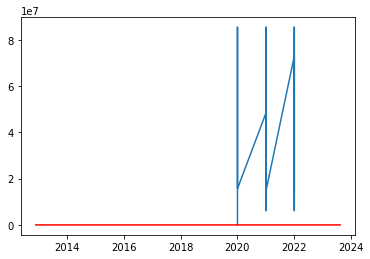

In [55]:
# Plot the predicted and actual values
plt.plot(test.EC)
plt.plot(predictions, color='red')
plt.show()